# Exploring Cellular Automata

In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

## Basic Checkerboard Pattern

In [2]:
def checkerboard(num_rows,num_cols):
    checkerboard = np.indices((num_rows, num_cols)).sum(axis=0) % 2

    plt.figure(figsize=(6,6))
    plt.imshow(checkerboard, cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

    plt.show()

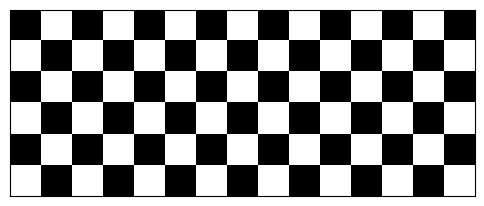

In [3]:
checkerboard(num_rows=6,num_cols=15)

In [4]:
def row_mutation(initial_row,num_rows):
    """
    Creates a matrix where each subsequent row is derived from the previous row

    Args:
        initial_row (list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run and rows to derive

    Returns:
        np.array: resulting matrix and plot in a unique checkerboard color pattern
    """
    
    current_row = np.array(initial_row)
    matrix = np.expand_dims(current_row, axis=0)
    
    for row in range(num_rows):
        next_row = ((current_row + 1)^2)
        matrix = np.append(matrix, np.expand_dims(next_row, axis=0), axis=0)
        current_row = next_row

   
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(matrix, cmap='grey', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

    return matrix, fig

(array([[ 1,  0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1],
        [ 0,  3,  3,  0,  0,  3,  0,  3,  0,  3,  3,  3,  0,  0],
        [ 3,  6,  6,  3,  3,  6,  3,  6,  3,  6,  6,  6,  3,  3],
        [ 6,  5,  5,  6,  6,  5,  6,  5,  6,  5,  5,  5,  6,  6],
        [ 5,  4,  4,  5,  5,  4,  5,  4,  5,  4,  4,  4,  5,  5],
        [ 4,  7,  7,  4,  4,  7,  4,  7,  4,  7,  7,  7,  4,  4],
        [ 7, 10, 10,  7,  7, 10,  7, 10,  7, 10, 10, 10,  7,  7],
        [10,  9,  9, 10, 10,  9, 10,  9, 10,  9,  9,  9, 10, 10]]),
 <Figure size 600x600 with 1 Axes>)

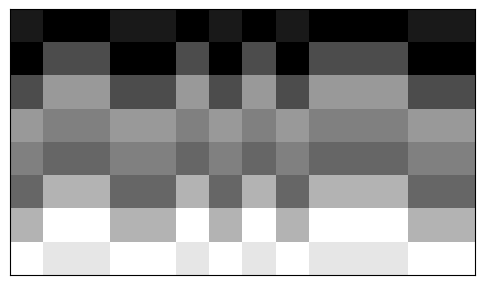

In [5]:
initial_row = [1,0,0,1,1,0,1,0,1,0,0,0,1,1]
row_mutation(initial_row,num_rows=7)

In [6]:
def checkerboard_pattern(initial_row,num_rows):
    """
    Creates a matrix where each subsequent row is derived from the previous row

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)

    Returns:
        np.array: resulting matrix and plot in a unique black and white checkerboard 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[row]
        next_row = []
        for square in range(len(current_row)):
            if current_row[square] == 0:
                next_square = 1
                
            elif current_row[square] == 1:
                next_square = 0
                
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])

    return matrix, fig


(array([[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]]),
 <Figure size 600x600 with 1 Axes>)

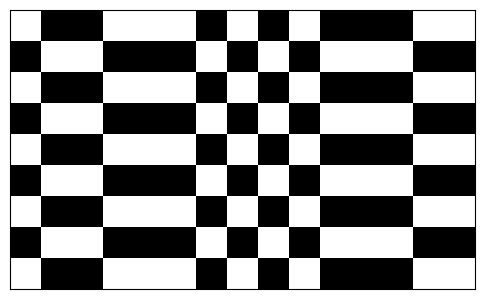

In [7]:
initial_row = [1,0,0,1,1,1,0,1,0,1,0,0,0,1,1]
checkerboard_pattern(initial_row,num_rows=8)

## Uniform Neighbors Rule

This algorithm is a 1-dimensional cellular automaton that evolves row by row using a symmetric uniform neighbor rule.For each cell, the algorithm examines its three-cell neighborhood: left, center, and right. A cell becomes 1 in the next generation if all neighbors match (all 0s or all 1s); otherwise, it becomes 0.

In [8]:
def uniform_neighbors_checkerboard(initial_row,num_rows):
    """
    Creates a matrix where each subsequent row is derived from the previous row applying symmetric neighbor expansion rule.

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)

    Returns:
        np.array: resulting plot in a unique black and white checkerboard 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[row]
        next_row = []
        for square in range(len(current_row)):
            # apply same neighbor rules, cent left and right square must be uniform
            left = current_row[square-1] if square > 0 else 0
            center = current_row[square]
            right = current_row[square+1] if square < len(current_row)-1 else 0
            
            if left == 0 and center == 0 and right == 0 or \
            left == 1 and center == 1 and right == 1:
                next_square = 0
             
            else:
                next_square = 1
                
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])


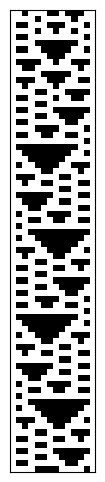

In [9]:
initial_row = [1,1,0,1,1,1,0,0,1,0,0,0,1,1]
uniform_neighbors_checkerboard(initial_row,num_rows=75)

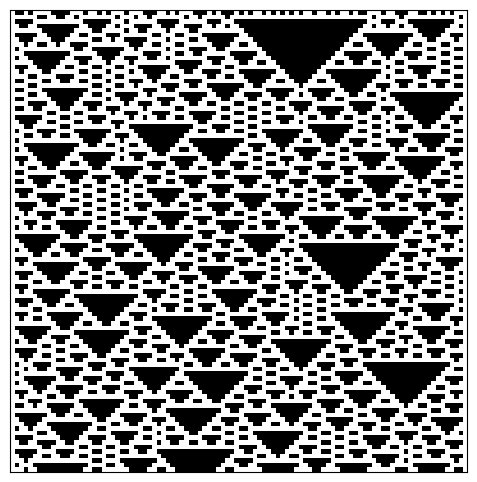

In [10]:
initial_row = [random.randint(0, 1) for _ in range(100)]
uniform_neighbors_checkerboard(initial_row,num_rows=100)

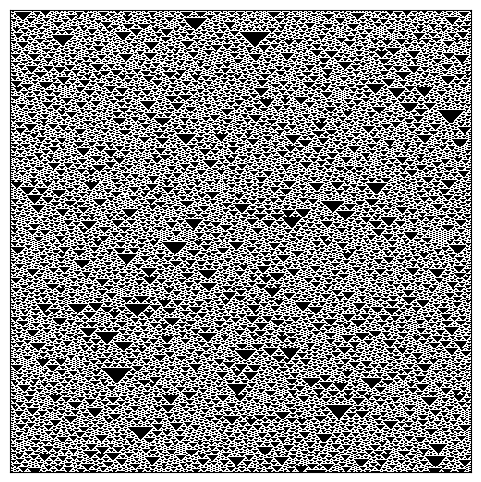

In [11]:
initial_row = [random.randint(0, 1) for _ in range(500)]
uniform_neighbors_checkerboard(initial_row,num_rows=500)

## Similar Neighbors Rule with Agreement Based Shading

This algorithm is a 1-dimensional cellular automaton that evolves row by row using a symmetric similar neighbor rule combined with distance-based shading. To create each new cell, the algorithm examines its preceeding row's neighborhoods: left, center, and right. If there are no similar neighbors the cell becomes a 1. Otherwise, a cell's assigned a value based on the number of similar neighbors (all less than 1 or all 1s). For visualization purposes, a cell's shading value is proportional to how many neighbors differ from it. 

In [16]:
def colorful_similar_neighbors_checkerboard(initial_row, num_rows, cmap='gray'):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row 
    applying symmetric neighbor expansion rule and number of similar neighbors based shading rule.

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)
        cmap (str): Color map name (default = "gray")

    Returns:
        np.array: plot of a unique pattern of inverted shaded triangles 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[row]
        next_row = []
        for square in range(len(current_row)):
            # apply same neighbor rules, center left and right square must be uniform
            left = current_row[square-1] if square > 0 else 0
            center = current_row[square]
            right = current_row[square+1] if square < len(current_row)-1 else 0
            
            if (left < 1 and center < 1 and right < 1) or \
            (left == 1 and center == 1 and right == 1):
                count = 1
                pointer = 2

                while True:
                    left_index  = square - pointer
                    right_index = square + pointer
    
                    # If out of bounds stop expanding
                    if left_index < 0 or right_index >= len(current_row):
                        break
                
                    left = current_row[left_index]
                    center = current_row[square]
                    right = current_row[right_index]
    
                    if (left < 1 and center < 1 and right < 1) or \
                    (left == 1 and center == 1 and right == 1):
                        count += 1
                        pointer += 1
                
                    else:
                        break

                next_square = 1-(1/(count+0.5))

            else:
                next_square = 1
                
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.imshow(matrix, cmap=cmap, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
#    plt.savefig('results/shaded_neighbors_pattern.jpg')
    plt.show()



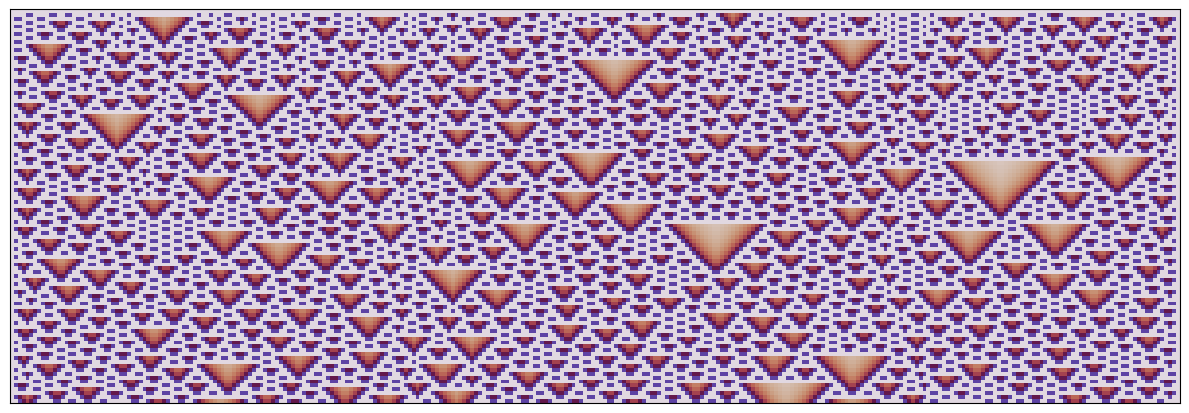

In [18]:
initial_row = [random.randint(0, 1) for _ in range(300)]
colorful_similar_neighbors_checkerboard(initial_row,num_rows=100, cmap='twilight')

## Exactly One Neighbor Rule
To creat each new cell, the function examines the left and right neighbors in the previous row. A new cell becomes 1 only if exactly one of those neighbors is 1. Otherwise, it becomes 0. (see Wolfram’s Rule 90)

In [94]:
def one_uniform_neighbor(initial_row,num_rows):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row applying 
    the exactly 1 neighbor is 1 rule. 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)

    Returns:
        np.array: resulting plot of pattern generated unique black and white checkerboard 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[-1]
        next_row = []
        for square in range(len(current_row)):
            # apply XOR rule, exactly one neighbor is 1
            left = current_row[square-1] if square > 0 else 0
            right = current_row[square+1] if square < len(current_row)-1 else 0
            next_square = 1 if ((left == 1) ^ (right == 1)) else 0 
            
            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    

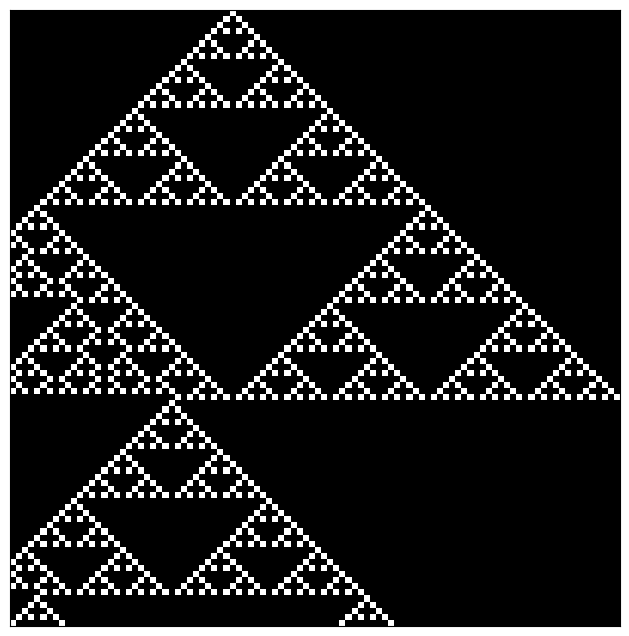

In [95]:
size = 100 # set the number of columns in the initial row
num_of_ones = 1 # set the number of 1s in the initial row
initial_row = np.zeros(size, dtype=int)
indices_of_ones = np.random.choice(size, num_of_ones, replace=False)
initial_row[indices_of_ones] = 1
one_uniform_neighbor(initial_row,num_rows=100)

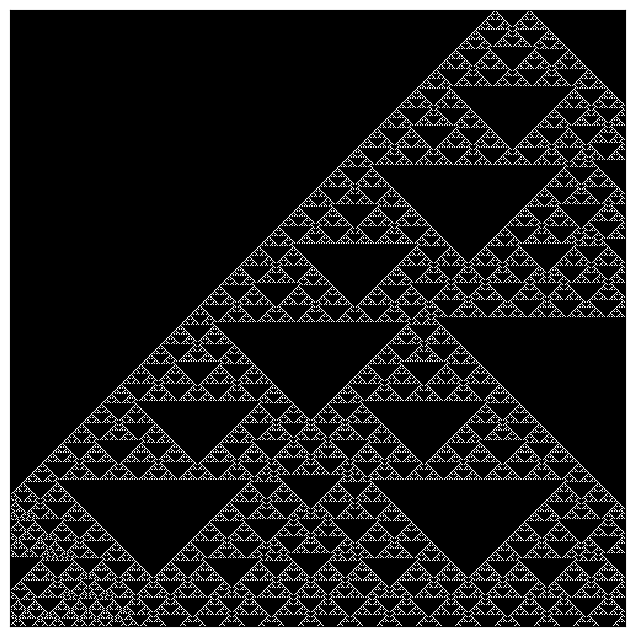

In [96]:
size = 500 # set the number of columns in the initial row
num_of_ones = 2
# set the number of 1s in the initial row
initial_row = np.zeros(size, dtype=int)
indices_of_ones = np.random.choice(size, num_of_ones, replace=False)
initial_row[indices_of_ones] = 1
one_uniform_neighbor(initial_row,num_rows=500)

In [470]:
def colorful_one_uniform_neighbor(initial_row, num_rows, decay, cmap='twilight_shifted'):
    """
    1D cellular automaton creating a matrix where each subsequent row is derived from the previous row applying 
    the exactly 1 neighbor is 1 rule. 

    Args:
        initial_row (binary list or np.array): first row of the matrix, specified by user
        num_rows (int): number of itterations to run (rows to derive and add to matrix)
        decay (int): for scaling color saturation
        cmap (str): Color map name (default = "twilight_shifted")

    Returns:
        np.array: resulting plot of generated pattern of unique shaded pyraminds 
    """

    initial_row = np.array(initial_row)
    matrix = [initial_row]

    for row in range(num_rows):
        current_row = matrix[-1]
        next_row = []
        for square in range(len(current_row)):
            # apply XOR rule, exactly one neighbor is 1
            left = current_row[square-1] if square > 0 else 0
            right = current_row[square+1] if square < len(current_row)-1 else 0
            
            if (left == 1) ^ (right == 1):
                next_square = 1

            else:

                count = 1
                pointer = 2 

                while True:
                    
                    left_index = square - pointer
                    right_index = square + pointer

                    if left_index < 0 or right_index >= len(current_row):
                        break

                    left = current_row[left_index]
                    right = current_row[right_index]

                    if (left != 1 and right != 1):
                        count += 1
                        pointer += 1
                                   
                    
                    else:
                        break  
                        
                next_square = 1 - np.exp(-count/decay)

            next_row.append(next_square)
            
        matrix.append(next_row)

    matrix = np.array(matrix)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(matrix, cmap=cmap, interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig('results/colorful_one_uniform_neighbor_pattern.jpg')
    plt.show()
    

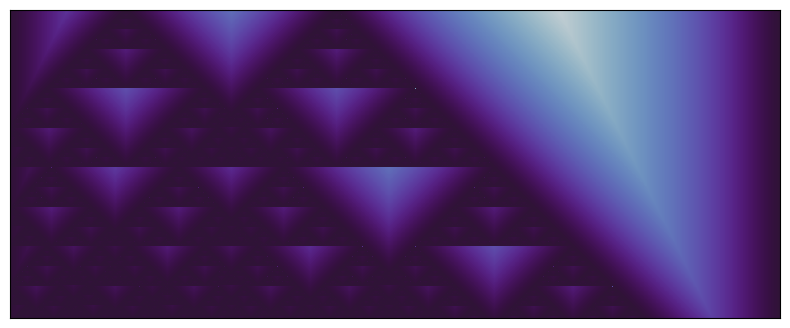

In [472]:
size = 2500 # set the number of columns in the initial row
num_of_ones = 2 # set the number of 1s in the initial row
decay = size/num_of_ones # scale for color saturation
initial_row = np.zeros(size, dtype=int)
indices_of_ones = np.random.choice(size, num_of_ones, replace=False)
initial_row[indices_of_ones] = 1
colorful_one_uniform_neighbor(initial_row, num_rows=1000, decay=decay, cmap='twilight_shifted')
